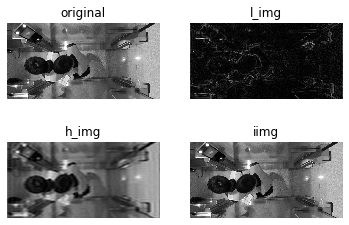

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("/home/lishuang/Disk/shengshi_data/new_anti_tail/beijing_daxing_06_dark_2675.jpg" , 0)
#计算二维的傅里叶变换
f = np.fft.fft2(img)
#将FFT输出中的直流分量移动到频谱中央
fshift = np.fft.fftshift(f)
rows , cols = img.shape
crow , ccol = int(rows/2) , int(cols/2)
#
mask = np.zeros((rows , cols ) , np.uint8)
mask[crow-30:crow+30 , ccol-30:ccol+30] = 1
l_shift = fshift.copy()
h_shift = fshift.copy()
l_shift[crow-30:crow+30 , ccol-30:ccol+30] = 0
h_shift = fshift * mask
#
# 进图像的低频和高频部分移动到图像原来的位置
l_ishift = np.fft.ifftshift(l_shift)
h_ishift = np.fft.ifftshift(h_shift)
ishift = np.fft.ifftshift(fshift)
#
#二维反变换
iimg = np.fft.ifft2(ishift)
l_img = np.fft.ifft2(l_shift)
h_img = np.fft.ifft2(h_shift)
#
#将复数转换为0至255范围
iimg = np.abs(iimg)
l_img = np.abs(l_img)
h_img = np.abs(h_img)
#
plt.subplot(221) , plt.imshow(img , cmap = 'gray')
plt.title('original') , plt.axis('off')
#
plt.subplot(222) , plt.imshow(l_img , cmap = 'gray')
plt.title('l_img') , plt.axis('off')
#
plt.subplot(223) , plt.imshow(h_img , cmap = 'gray')
plt.title('h_img') , plt.axis('off')
#
plt.subplot(224) , plt.imshow(iimg , cmap = 'gray')
plt.title('iimg') , plt.axis('off')
plt.show()

rows= 320
cols= 640


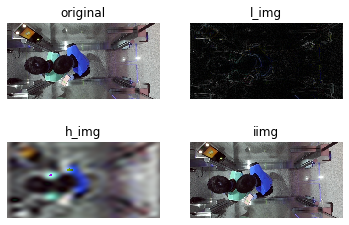

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("/home/lishuang/Disk/shengshi_data/new_anti_tail/beijing_daxing_06_dark_2675.jpg" , 1)
img_b=img[:,:,0]
img_g=img[:,:,1]
img_r=img[:,:,2]

#计算二维的傅里叶变换
f_b = np.fft.fft2(img_b)
f_g = np.fft.fft2(img_g)
f_r = np.fft.fft2(img_r)
#将FFT输出中的直流分量移动到频谱中央
fshift_b = np.fft.fftshift(f_b)
fshift_g = np.fft.fftshift(f_g)
fshift_r = np.fft.fftshift(f_r)
rows , cols = img_b.shape
crow , ccol = int(rows/2) , int(cols/2)
print("rows=",rows)
print("cols=",cols)
#
mask = np.zeros((rows , cols ) , np.uint8)
# mask[crow-30:crow+30 , ccol-30:ccol+30] = 1
mask[crow-10:crow+10 , ccol-10:ccol+10] = 1
l_shift_b = fshift_b.copy()
h_shift_b = fshift_b.copy()
l_shift_b[crow-30:crow+30 , ccol-30:ccol+30] = 0
h_shift_b = fshift_b * mask
l_shift_g = fshift_g.copy()
h_shift_g = fshift_g.copy()
l_shift_g[crow-30:crow+30 , ccol-30:ccol+30] = 0
h_shift_g = fshift_g * mask
l_shift_r = fshift_r.copy()
h_shift_r = fshift_r.copy()
l_shift_r[crow-30:crow+30 , ccol-30:ccol+30] = 0
h_shift_r = fshift_r * mask

#
# 进图像的低频和高频部分移动到图像原来的位置
l_ishift_b = np.fft.ifftshift(l_shift_b)
h_ishift_b = np.fft.ifftshift(h_shift_b)
ishift_b = np.fft.ifftshift(fshift_b)
l_ishift_g = np.fft.ifftshift(l_shift_g)
h_ishift_g = np.fft.ifftshift(h_shift_g)
ishift_g = np.fft.ifftshift(fshift_g)
l_ishift_r = np.fft.ifftshift(l_shift_r)
h_ishift_r = np.fft.ifftshift(h_shift_r)
ishift_r = np.fft.ifftshift(fshift_r)
#
#二维反变换
iimg_b = np.fft.ifft2(ishift_b)
l_img_b = np.fft.ifft2(l_shift_b)
h_img_b = np.fft.ifft2(h_shift_b)
iimg_g = np.fft.ifft2(ishift_g)
l_img_g = np.fft.ifft2(l_shift_g)
h_img_g = np.fft.ifft2(h_shift_g)
iimg_r = np.fft.ifft2(ishift_r)
l_img_r = np.fft.ifft2(l_shift_r)
h_img_r = np.fft.ifft2(h_shift_r)
#
#将复数转换为0至255范围
iimg_b = np.abs(iimg_b)
l_img_b = np.abs(l_img_b)
h_img_b = np.abs(h_img_b)
iimg_g = np.abs(iimg_g)
l_img_g = np.abs(l_img_g)
h_img_g = np.abs(h_img_g)
iimg_r = np.abs(iimg_r)
l_img_r = np.abs(l_img_r)
h_img_r = np.abs(h_img_r)

l_img = np.ones(img.shape, dtype=np.uint8)
l_img[:, :, 0] = l_img_b
l_img[:, :, 1] = l_img_g
l_img[:, :, 2] = l_img_r
h_img = np.ones(img.shape, dtype=np.uint8)
h_img[:, :, 0] = h_img_b
h_img[:, :, 1] = h_img_g
h_img[:, :, 2] = h_img_r
iimg = np.ones(img.shape, dtype=np.uint8)
iimg[:, :, 0] = iimg_b
iimg[:, :, 1] = iimg_g
iimg[:, :, 2] = iimg_r


cv2.imwrite("h_img.jpg",h_img)
cv2.imwrite("iimg.jpg",iimg)
cv2.imwrite("l_img.jpg",l_img)
cv2.imwrite("original.jpg",img)

#
plt.subplot(221) , plt.imshow(img )
plt.title('original') , plt.axis('off')
#
plt.subplot(222) , plt.imshow(l_img )
plt.title('l_img') , plt.axis('off')
#
plt.subplot(223) , plt.imshow(h_img )
plt.title('h_img') , plt.axis('off')
#
plt.subplot(224) , plt.imshow(iimg )
plt.title('iimg') , plt.axis('off')
plt.show()

(20720133+0j)


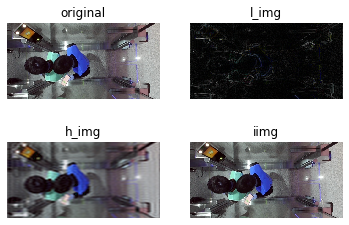

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("/home/lishuang/Disk/shengshi_data/new_anti_tail/beijing_daxing_06_dark_2675.jpg" , 1)
img_b=img[:,:,0]
img_g=img[:,:,1]
img_r=img[:,:,2]

#计算二维的傅里叶变换
f_b = np.fft.fft2(img_b)
f_g = np.fft.fft2(img_g)
f_r = np.fft.fft2(img_r)
#将FFT输出中的直流分量移动到频谱中央
fshift_b = np.fft.fftshift(f_b)
fshift_g = np.fft.fftshift(f_g)
fshift_r = np.fft.fftshift(f_r)
rows , cols = img_b.shape
crow , ccol = int(rows/2) , int(cols/2)

print(fshift_b.max())
#
mask = np.zeros((rows , cols ) , np.uint8)
# mask[crow-30:crow+30 , ccol-30:ccol+30] = 1
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
l_shift_b = fshift_b.copy()
h_shift_b = fshift_b.copy()
l_shift_b[crow-30:crow+30 , ccol-30:ccol+30] = 0
h_shift_b = fshift_b * mask
l_shift_g = fshift_g.copy()
h_shift_g = fshift_g.copy()
l_shift_g[crow-30:crow+30 , ccol-30:ccol+30] = 0
h_shift_g = fshift_g * mask
l_shift_r = fshift_r.copy()
h_shift_r = fshift_r.copy()
l_shift_r[crow-30:crow+30 , ccol-30:ccol+30] = 0
h_shift_r = fshift_r * mask

#
# 进图像的低频和高频部分移动到图像原来的位置
l_ishift_b = np.fft.ifftshift(l_shift_b)
h_ishift_b = np.fft.ifftshift(h_shift_b)
ishift_b = np.fft.ifftshift(fshift_b)
l_ishift_g = np.fft.ifftshift(l_shift_g)
h_ishift_g = np.fft.ifftshift(h_shift_g)
ishift_g = np.fft.ifftshift(fshift_g)
l_ishift_r = np.fft.ifftshift(l_shift_r)
h_ishift_r = np.fft.ifftshift(h_shift_r)
ishift_r = np.fft.ifftshift(fshift_r)
#
#二维反变换
iimg_b = np.fft.ifft2(ishift_b)
l_img_b = np.fft.ifft2(l_shift_b)
h_img_b = np.fft.ifft2(h_shift_b)
iimg_g = np.fft.ifft2(ishift_g)
l_img_g = np.fft.ifft2(l_shift_g)
h_img_g = np.fft.ifft2(h_shift_g)
iimg_r = np.fft.ifft2(ishift_r)
l_img_r = np.fft.ifft2(l_shift_r)
h_img_r = np.fft.ifft2(h_shift_r)
#
#将复数转换为0至255范围
iimg_b = np.abs(iimg_b)
l_img_b = np.abs(l_img_b)
h_img_b = np.abs(h_img_b)
iimg_g = np.abs(iimg_g)
l_img_g = np.abs(l_img_g)
h_img_g = np.abs(h_img_g)
iimg_r = np.abs(iimg_r)
l_img_r = np.abs(l_img_r)
h_img_r = np.abs(h_img_r)

ymax = 255
ymin = 0
xmax_b = max(map(max,h_img_b))
xmin_b = min(map(min,h_img_b))
xmax_g = max(map(max,h_img_g))
xmin_g = min(map(min,h_img_g))
xmax_r = max(map(max,h_img_r))
xmin_r = min(map(min,h_img_r))
for i in range(rows):
    for j in range(cols):
        h_img_b[i][j] = round(((ymax-ymin)*(h_img_b[i][j]-xmin_b)/(xmax_b-xmin_b))+ymin)
        h_img_g[i][j] = round(((ymax-ymin)*(h_img_g[i][j]-xmin_g)/(xmax_g-xmin_g))+ymin)
        h_img_r[i][j] = round(((ymax-ymin)*(h_img_r[i][j]-xmin_r)/(xmax_r-xmin_r))+ymin)

l_img = np.ones(img.shape, dtype=np.uint8)
l_img[:, :, 0] = l_img_b
l_img[:, :, 1] = l_img_g
l_img[:, :, 2] = l_img_r
h_img = np.ones(img.shape, dtype=np.uint8)
h_img[:, :, 0] = h_img_b
h_img[:, :, 1] = h_img_g
h_img[:, :, 2] = h_img_r
iimg = np.ones(img.shape, dtype=np.uint8)
iimg[:, :, 0] = iimg_b
iimg[:, :, 1] = iimg_g
iimg[:, :, 2] = iimg_r


cv2.imwrite("h_img.jpg",h_img)
cv2.imwrite("iimg.jpg",iimg)
cv2.imwrite("l_img.jpg",l_img)
cv2.imwrite("original.jpg",img)

#
plt.subplot(221) , plt.imshow(img )
plt.title('original') , plt.axis('off')
#
plt.subplot(222) , plt.imshow(l_img )
plt.title('l_img') , plt.axis('off')
#
plt.subplot(223) , plt.imshow(h_img )
plt.title('h_img') , plt.axis('off')
#
plt.subplot(224) , plt.imshow(iimg )
plt.title('iimg') , plt.axis('off')
plt.show()

TypeError: Expected cv::UMat for argument 'src'